In [1]:
from dl_toolbox.lightning_datamodules import *
import matplotlib.pyplot as plt 
import numpy as np
from skimage import exposure
from pathlib import Path
from random import shuffle


/d/pfournie/dl_toolbox/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


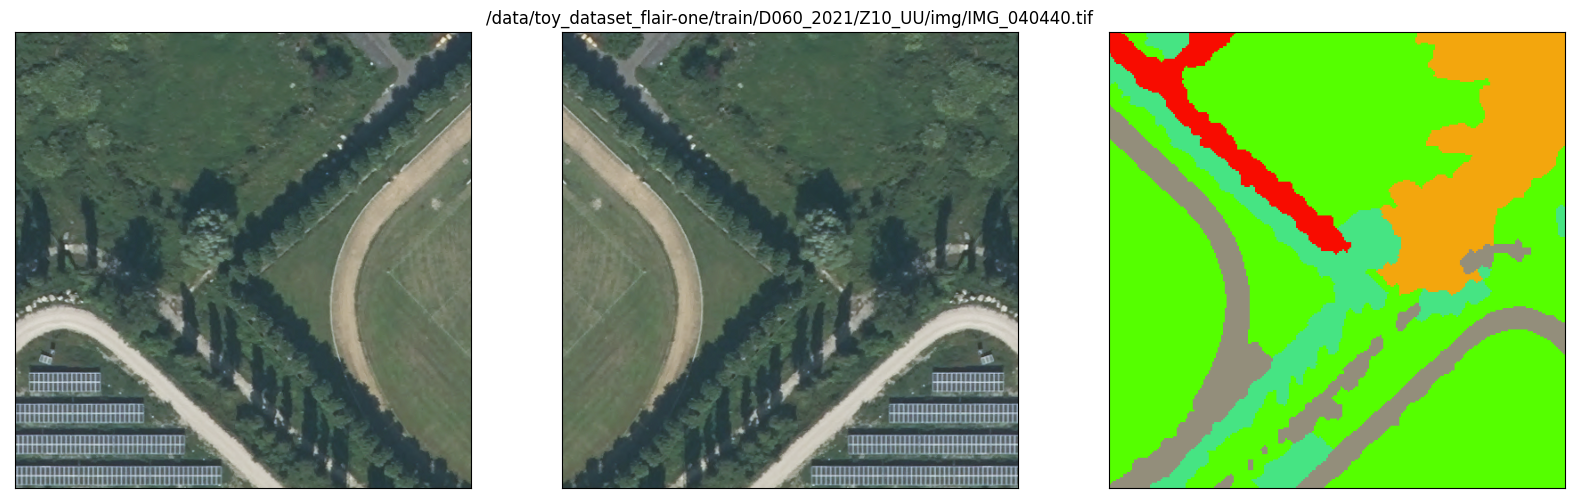

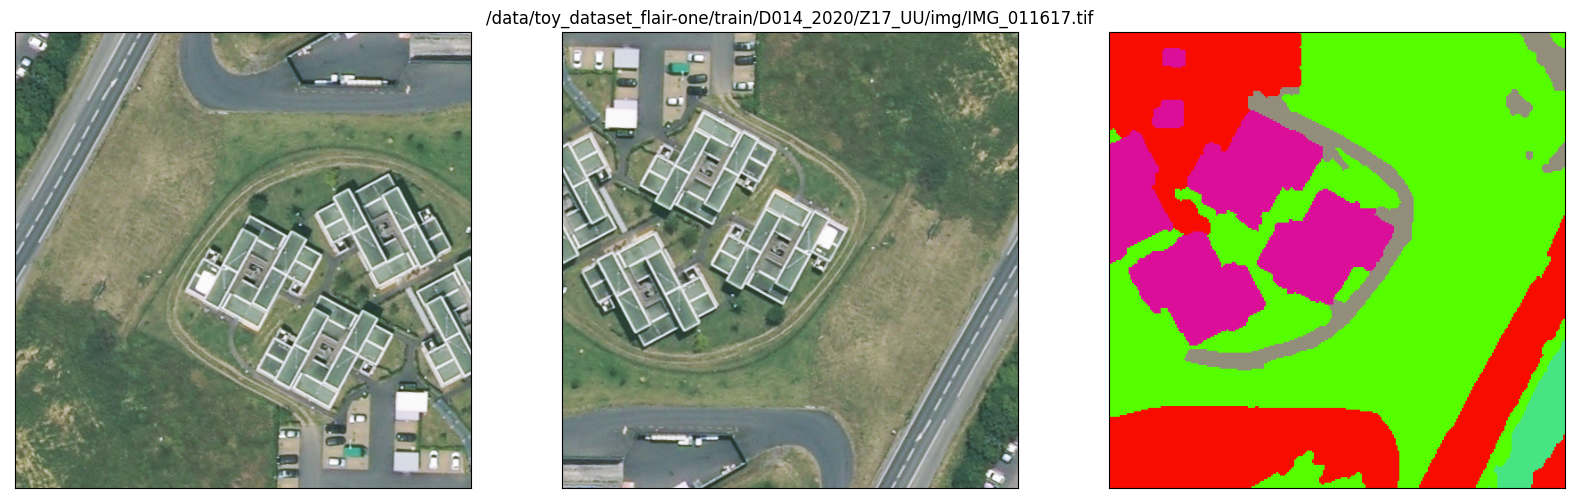

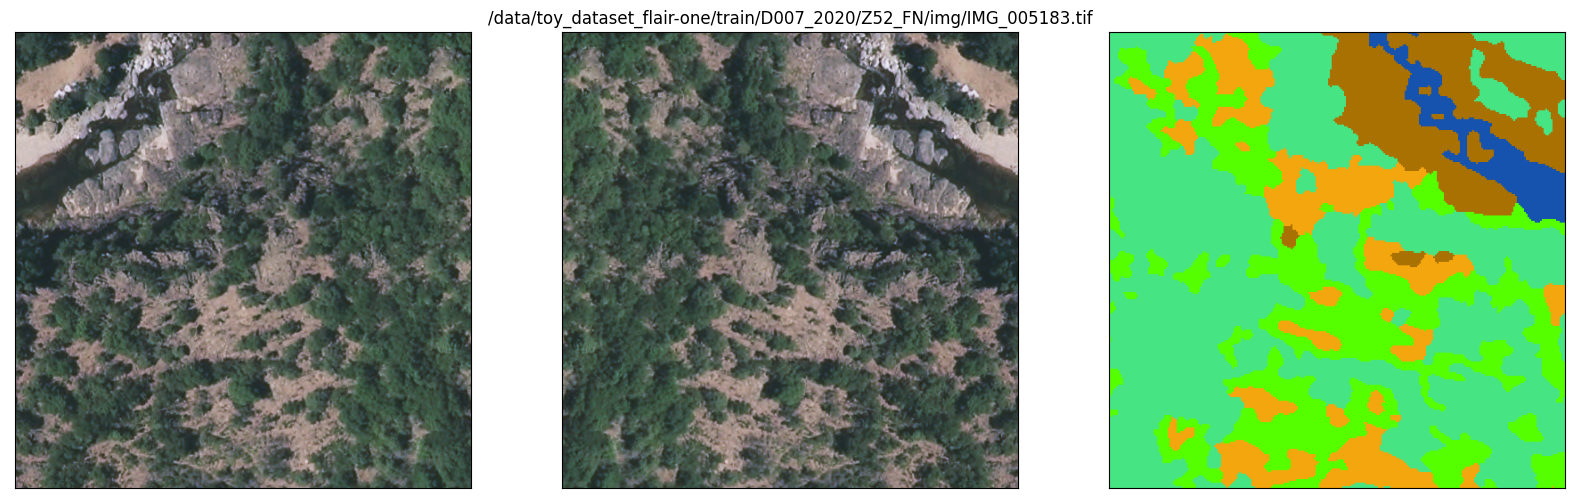

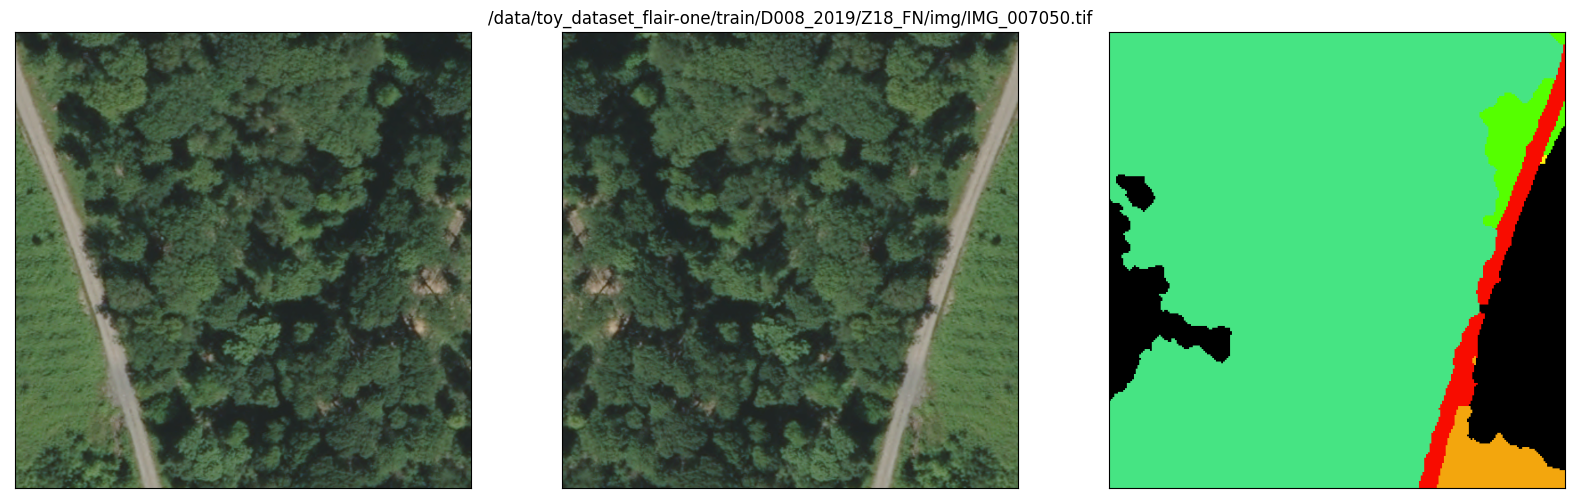

In [2]:
splitfile_path = '/d/pfournie/ai4geo/splits/digitanie/Biarritz.csv'
data_path = '/data/digitanie_v2'

splitfile_path = '/d/pfournie/ai4geo/splits/semcity/split_semcity.csv'
data_path = '/d/pfournie/ai4geo/data/SemCity-Toulouse-bench'

splitfile_path = '/d/pfournie/ai4geo/splits/airs/airs.csv'
data_path = '/data/AIRS/trainval'

splitfile_path = '/d/pfournie/ai4geo/splits/mw/christchurch.csv'
data_path = '/d/pfournie/ai4geo/data/miniworld_tif'

data_path = Path('/data/toy_dataset_flair-one')
trainval_domains = [data_path / "train" / domain for domain in os.listdir(data_path / "train")]
shuffle(trainval_domains)
idx_split = int(len(trainval_domains) * 0.9)
train_domains, val_domains = trainval_domains[:idx_split], trainval_domains[idx_split:] 
test_domains = [data_path / "test" / domain for domain in os.listdir(data_path / "test")]

dm = Flair(
    #data_path,
    batch_size=4,
    labels='13',
    workers=4,
    use_metadata=False,
    train_domains=train_domains,
    val_domains=val_domains,
    test_domains=test_domains,
    unsup_train_idxs=None,
    img_aug='d4',
    unsup_img_aug=None,
)

train_dl = dm.train_dataloader()
val_dl = dm.val_dataloader()

for i, batch in enumerate(train_dl['sup']):
    for j in range(4):
        f, ax = plt.subplots(ncols=3, figsize=(20,12))
        ax[0].imshow(batch['orig_image'][j].numpy().transpose(1,2,0)[...,:3])
        ax[1].imshow(batch['image'][j].numpy().transpose(1,2,0)[...,:3])
        ax[2].imshow(dm.train_set.labels_to_rgb(batch['mask'][j].numpy()))
        ax[1].set_title(batch['path'][j])
        for l in range(3):
            ax[l].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()  
    break

In [ ]:
dm = FromFolderDataset(
    folder_dataset='Resisc',
    data_path='/d/pfournie/ai4geo/data/NWPU-RESISC45',
    epoch_len=100,
    batch_size=4,
    workers=0,
    train_idxs=[700*i+j for i in range(45) for j in range(50)],
    test_idxs=[700*i+j for i in range(45) for j in range(50,100)],
    unsup_train_idxs=[700*i+j for i in range(45) for j in range(100)],
    img_aug='d4',
    unsup_img_aug='color-5'
)

train_dl = dm.train_dataloader()
val_dl = dm.val_dataloader()

for i, batch in enumerate(val_dl):
    for j in range(4):
        f, ax = plt.subplots(ncols=2, figsize=(20,12))
        ax[0].imshow(batch['orig_image'][j].numpy().transpose(1,2,0))
        ax[1].imshow(batch['image'][j].numpy().transpose(1,2,0))
        ax[0].set_title(batch['path'][j])
        ax[1].set_title(int(batch['mask'][j]))
        for l in range(2):
            ax[l].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()  
    break
